In [7]:
import stim
import numpy as np

distance = 3
rounds = 1
noise_list = np.array([1, 1, 2, 1])* 1e-2

circuit = stim.Circuit.generated("repetition_code:memory",
                                distance=distance,
                                rounds=rounds)

In [8]:
print(circuit)

R 0 1 2 3 4
TICK
CX 0 1 2 3
TICK
CX 2 1 4 3
TICK
MR 1 3
DETECTOR(1, 0) rec[-2]
DETECTOR(3, 0) rec[-1]
M 0 2 4
DETECTOR(1, 1) rec[-2] rec[-3] rec[-5]
DETECTOR(3, 1) rec[-1] rec[-2] rec[-4]
OBSERVABLE_INCLUDE(0) rec[-1]


In [9]:
import stim
import numpy as np

distance = 5
rounds = 1
noise_list = np.array([1, 1, 2, 1])* 1e-2

circuit = stim.Circuit.generated("repetition_code:memory",
                                distance=distance,
                                rounds=rounds,
                                after_clifford_depolarization=noise_list[0], #two-qubit-fidelity,
                                after_reset_flip_probability=noise_list[1], #reset error,
                                before_measure_flip_probability=noise_list[2], #measurement error,
                                before_round_data_depolarization=noise_list[3]) #idle error)

In [10]:
print(circuit)

R 0 1 2 3 4 5 6 7 8
X_ERROR(0.01) 0 1 2 3 4 5 6 7 8
TICK
DEPOLARIZE1(0.01) 0 2 4 6 8
CX 0 1 2 3 4 5 6 7
DEPOLARIZE2(0.01) 0 1 2 3 4 5 6 7
TICK
CX 2 1 4 3 6 5 8 7
DEPOLARIZE2(0.01) 2 1 4 3 6 5 8 7
TICK
X_ERROR(0.02) 1 3 5 7
MR 1 3 5 7
X_ERROR(0.01) 1 3 5 7
DETECTOR(1, 0) rec[-4]
DETECTOR(3, 0) rec[-3]
DETECTOR(5, 0) rec[-2]
DETECTOR(7, 0) rec[-1]
X_ERROR(0.02) 0 2 4 6 8
M 0 2 4 6 8
DETECTOR(1, 1) rec[-4] rec[-5] rec[-9]
DETECTOR(3, 1) rec[-3] rec[-4] rec[-8]
DETECTOR(5, 1) rec[-2] rec[-3] rec[-7]
DETECTOR(7, 1) rec[-1] rec[-2] rec[-6]
OBSERVABLE_INCLUDE(0) rec[-1]


In [11]:
new_circuit = stim.Circuit()

for instr in circuit:
    new_circuit.append_operation(instr)
    if instr.name == 'CX' and stim.GateTarget(0) in instr.targets_copy():
        new_circuit.append_operation('DEPOLARIZE1', 0, arg=0.001) 
        


print(new_circuit)

    


R 0 1 2 3 4 5 6 7 8
X_ERROR(0.01) 0 1 2 3 4 5 6 7 8
TICK
DEPOLARIZE1(0.01) 0 2 4 6 8
CX 0 1 2 3 4 5 6 7
DEPOLARIZE1(0.001) 0
DEPOLARIZE2(0.01) 0 1 2 3 4 5 6 7
TICK
CX 2 1 4 3 6 5 8 7
DEPOLARIZE2(0.01) 2 1 4 3 6 5 8 7
TICK
X_ERROR(0.02) 1 3 5 7
MR 1 3 5 7
X_ERROR(0.01) 1 3 5 7
DETECTOR(1, 0) rec[-4]
DETECTOR(3, 0) rec[-3]
DETECTOR(5, 0) rec[-2]
DETECTOR(7, 0) rec[-1]
X_ERROR(0.02) 0 2 4 6 8
M 0 2 4 6 8
DETECTOR(1, 1) rec[-4] rec[-5] rec[-9]
DETECTOR(3, 1) rec[-3] rec[-4] rec[-8]
DETECTOR(5, 1) rec[-2] rec[-3] rec[-7]
DETECTOR(7, 1) rec[-1] rec[-2] rec[-6]
OBSERVABLE_INCLUDE(0) rec[-1]


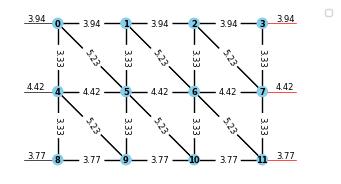

In [6]:
from soft_info import draw_matching_graph
import pymatching

matching = pymatching.Matching(circuit.detector_error_model())

draw_matching_graph(matching, distance, rounds, figsize=(3,3), scale_factor=0.5)


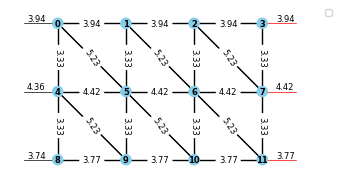

In [7]:
from soft_info import draw_matching_graph
import pymatching

matching = pymatching.Matching(new_circuit.detector_error_model())

draw_matching_graph(matching, distance, rounds, figsize=(3,3), scale_factor=0.5)
